NAMA : Iqbal Azzufar Sidqi
NIM  : A11.2022.14215
KLMPK: A11.4507

Load Dataset and Libraries

In [839]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline

Eksplorasi Data

In [840]:
file_path = '/content/Student Mental health.csv'
data = pd.read_csv(file_path)
data

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21.0,BCS,year 1,3.50 - 4.00,No,No,Yes,No,No
97,13/07/2020 21:21:42,Male,18.0,Engineering,Year 2,3.00 - 3.49,No,Yes,Yes,No,No
98,13/07/2020 21:22:56,Female,19.0,Nursing,Year 3,3.50 - 4.00,Yes,Yes,No,Yes,No
99,13/07/2020 21:23:57,Female,23.0,Pendidikan Islam,year 4,3.50 - 4.00,No,No,No,No,No


In [841]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [842]:
# Display the first few rows of the dataset
print("Dataset Preview\n", data.head())

Dataset Preview
         Timestamp Choose your gender   Age What is your course?  \
0  8/7/2020 12:02             Female  18.0          Engineering   
1  8/7/2020 12:04               Male  21.0    Islamic education   
2  8/7/2020 12:05               Male  19.0                  BIT   
3  8/7/2020 12:06             Female  22.0                 Laws   
4  8/7/2020 12:13               Male  23.0         Mathemathics   

  Your current year of Study What is your CGPA? Marital status  \
0                     year 1        3.00 - 3.49             No   
1                     year 2        3.00 - 3.49             No   
2                     Year 1        3.00 - 3.49             No   
3                     year 3        3.00 - 3.49            Yes   
4                     year 4        3.00 - 3.49             No   

  Do you have Depression? Do you have Anxiety? Do you have Panic attack?  \
0                     Yes                   No                       Yes   
1                      No      

Preprocessing Data

In [843]:
print("Missing values:\n",data.isnull().sum())

Missing values:
 Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64


In [844]:
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [845]:
data = data.loc[:,data.apply(pd.Series.nunique) != 1]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [846]:
categorical_col = []
for column in data.columns:
    if data[column].dtype == object and len(data[column].unique()) <= 50:
        categorical_col.append(column)
        print(f"{column} : {data[column].unique()}")
        print("====================================")

Choose your gender : ['Female' 'Male']
What is your course? : ['Engineering' 'Islamic education' 'BIT' 'Laws' 'Mathemathics'
 'Pendidikan islam' 'BCS' 'Human Resources' 'Irkhs' 'Psychology' 'KENMS'
 'Accounting ' 'ENM' 'Marine science' 'KOE' 'Banking Studies'
 'Business Administration' 'Law' 'KIRKHS' 'Usuluddin ' 'TAASL' 'Engine'
 'ALA' 'Biomedical science' 'koe' 'Kirkhs' 'BENL' 'Benl' 'IT' 'CTS'
 'engin' 'Econs' 'MHSC' 'Malcom' 'Kop' 'Human Sciences ' 'Biotechnology'
 'Communication ' 'Diploma Nursing' 'Pendidikan Islam ' 'Radiography'
 'psychology' 'Fiqh fatwa ' 'DIPLOMA TESL' 'Koe' 'Fiqh'
 'Islamic Education' 'Nursing ' 'Pendidikan Islam']
Your current year of Study : ['year 1' 'year 2' 'Year 1' 'year 3' 'year 4' 'Year 2' 'Year 3']
What is your CGPA? : ['3.00 - 3.49' '3.50 - 4.00' '3.50 - 4.00 ' '2.50 - 2.99' '2.00 - 2.49'
 '0 - 1.99']
Marital status : ['No' 'Yes']
Do you have Depression? : ['Yes' 'No']
Do you have Anxiety? : ['No' 'Yes']
Do you have Panic attack? : ['Yes' 'No']
Did

In [847]:
data.drop( ['Timestamp'] , axis = 1 ,inplace = True)

In [848]:
data.head()

,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [849]:
nama = {
    'Choose your gender' : 'Kelamin',
    'Age' : 'Umur',
    'What is your course?' : 'Jurusan',
    'Do you have a family history of mental illness' : 'Keluarga',
    'Your current year of Study' : 'Tahun',
    'Marital status' : 'Status',
    'What is your CGPA?' : 'IPK',
    'Do you have Depression?' : 'Depresi',
    'Do you have Anxiety?' : 'Kecemasan',
    'Do you have Panic attack?' : 'Panic attack',
    'Did you seek any specialist for a treatment?' : 'Konsultasi',
}
data.rename(columns=nama,inplace=True)
data.head()

,Kelamin,Umur,Jurusan,Tahun,IPK,Status,Depresi,Kecemasan,Panic attack,Konsultasi
0,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [850]:
data['IPK'].value_counts()

,count
IPK,
3.50 - 4.00,47
3.00 - 3.49,43
2.50 - 2.99,4
0 - 1.99,4
2.00 - 2.49,2
3.50 - 4.00,1


In [851]:
SEX_mapping = {
    'Female': 0,'Male': 1}
data['Kelamin'] = data['Kelamin'].map(SEX_mapping)

Tahun_mapping = {
    'year 1': 0, 'Year 1' : 0,
    'year 2': 1, 'Year 2' : 1,
    'year 3': 2, 'Year 3' : 2,
    'year 4': 3}
data['Tahun'] = data['Tahun'].map(Tahun_mapping)

Status_mapping = {
    'No': 0, 'Yes': 1}
data['Status'] = data['Status'].map(Status_mapping)

Depresi_mapping = {
    'No': 0, 'Yes': 1}
data['Depresi'] = data['Depresi'].map(Depresi_mapping)

Kecemasan_mapping = {
    'No': 0, 'Yes': 1}
data['Kecemasan'] = data['Kecemasan'].map(Kecemasan_mapping)

Panic_mapping = {
    'No': 0, 'Yes': 1}
data['Panic attack'] = data['Panic attack'].map(Panic_mapping)

Konsultasi_mapping = {
    'No': 0, 'Yes': 1}
data['Konsultasi'] = data['Konsultasi'].map(Konsultasi_mapping)

IPK_mapping = {
    '0 - 1.99': 0,
    '2.00 - 2.49': 1,
    '2.50 - 2.99': 2,
    '3.00 - 3.49': 3,
    '3.50 - 4.00 ': 4,  '3.50 - 4.00' :4
    }
data['IPK'] = data['IPK'].map(IPK_mapping)

In [852]:
data.drop( ['Jurusan'] , axis = 1 ,inplace = True)

In [853]:
# Drop rows with missing values (if any)
data = data.dropna()
print("Dataset after removing missing values:\n", data.head())

Dataset after removing missing values:
    Kelamin  Umur  Tahun  IPK  Status  Depresi  Kecemasan  Panic attack  \
0        0  18.0      0    3       0        1          0             1   
1        1  21.0      1    3       0        0          1             0   
2        1  19.0      0    3       0        1          1             1   
3        0  22.0      2    3       1        1          0             0   
4        1  23.0      3    3       0        0          0             0   

   Konsultasi  
0           0  
1           0  
2           0  
3           0  
4           0  


In [854]:
# Encode categorical data (if applicable, e.g., text-based features)
data_encoded = pd.get_dummies(data, drop_first=True)
print("Dataset after encoding:\n", data_encoded.head())

Dataset after encoding:
    Kelamin  Umur  Tahun  IPK  Status  Depresi  Kecemasan  Panic attack  \
0        0  18.0      0    3       0        1          0             1   
1        1  21.0      1    3       0        0          1             0   
2        1  19.0      0    3       0        1          1             1   
3        0  22.0      2    3       1        1          0             0   
4        1  23.0      3    3       0        0          0             0   

   Konsultasi  
0           0  
1           0  
2           0  
3           0  
4           0  


In [855]:
# Define features (X) and target (y)
# Assuming the dataset contains a 'Target' column for mental health classification
X = data_encoded.drop('Umur', axis=1)  # Corrected column name
y = data_encoded['Umur']  # Corrected column name
print(data_encoded.columns)

Index(['Kelamin', 'Umur', 'Tahun', 'IPK', 'Status', 'Depresi', 'Kecemasan',
       'Panic attack', 'Konsultasi'],
      dtype='object')


In [856]:
data.head()
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 0 to 100
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Kelamin       100 non-null    int64  
 1   Umur          100 non-null    float64
 2   Tahun         100 non-null    int64  
 3   IPK           100 non-null    int64  
 4   Status        100 non-null    int64  
 5   Depresi       100 non-null    int64  
 6   Kecemasan     100 non-null    int64  
 7   Panic attack  100 non-null    int64  
 8   Konsultasi    100 non-null    int64  
dtypes: float64(1), int64(8)
memory usage: 7.8 KB


In [857]:
data['IPK'].value_counts()

,count
IPK,
4,48
3,43
2,4
0,3
1,2


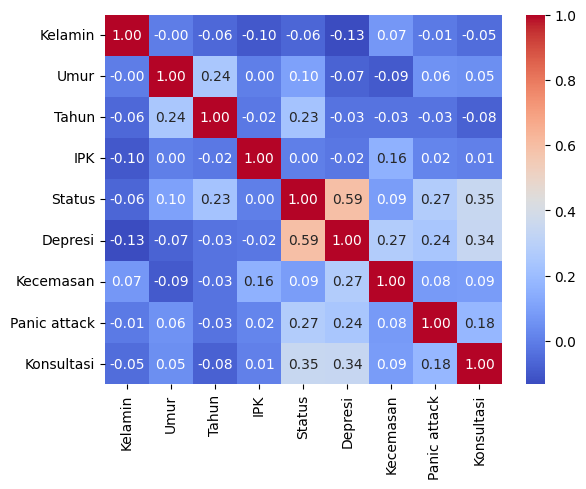

<Figure size 1500x600 with 0 Axes>

In [858]:
# Create the heatmap
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", fmt=".2f")

# Set the figure size
plt.figure(figsize=(15, 6))

# Show the heatmap
plt.show()

Modeling

In [859]:
X = data.drop('Depresi', axis=1)
y = data['Depresi']

X.head()

,Kelamin,Umur,Tahun,IPK,Status,Kecemasan,Panic attack,Konsultasi
0,0,18.0,0,3,0,0,1,0
1,1,21.0,1,3,0,1,0,0
2,1,19.0,0,3,0,1,1,0
3,0,22.0,2,3,1,0,0,0
4,1,23.0,3,3,0,0,0,0


In [860]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [861]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("Training and testing split completed.")

Training and testing split completed.


In [862]:
print("bagian x train" , x_train.shape)
print("bagian x test" , x_test.shape)
print("bagian y train ", y_train.shape)
print("bagian y test",y_test.shape )

bagian x train (80, 65)
bagian x test (20, 65)
bagian y train  (80,)
bagian y test (20,)


In [863]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [864]:
y_pred = model.predict(X_test)
print("Model predictions completed.")

Model predictions completed.


Evaluasi Model

In [865]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:\n", confusion)

Model Accuracy: 90.00%
Accuracy: 0.9
Precision: 1.0
Recall: 0.6
Confusion Matrix:
 [[15  0]
 [ 2  3]]


In [866]:
# Display classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.88      1.00      0.94        15
           1       1.00      0.60      0.75         5

    accuracy                           0.90        20
   macro avg       0.94      0.80      0.84        20
weighted avg       0.91      0.90      0.89        20



Visualisasi Hasil

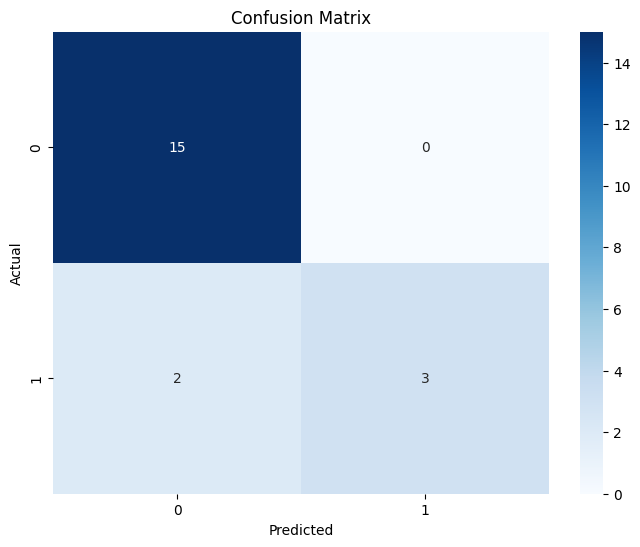

In [867]:
# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Testing


In [868]:
testing ={
    'SEX' : [1,0],
    'Umur' : [21,25],
    'Tahun' : [3 , 2],
    'IPK' : [1,4],
    'Status' : [1,1],
    'Kecemasan' : [1,0],
    'Panic attack' : [1,0],
    'Konsultasi' : [1,0]
}
testing = pd.DataFrame(testing)
testing.head()

,SEX,Umur,Tahun,IPK,Status,Kecemasan,Panic attack,Konsultasi
0,1,21,3,1,1,1,1,1
1,0,25,2,4,1,0,0,0


In [869]:
scaler = StandardScaler()
testing = scaler.fit_transform(testing)
print(testing)

[[ 1. -1.  1. -1.  0.  1.  1.  1.]
 [-1.  1. -1.  1.  0. -1. -1. -1.]]


In [870]:
y_pred_test = model.predict(testing)
print(y_pred_test)

[1 1]


In [871]:
print(" Hasil prediksinya adalah ")
for i in y_pred_test:
    if i == 1:
        print("Depresi")
    else:
        print("Tidak Depresi")

 Hasil prediksinya adalah 
Depresi
Depresi
